<a href="https://colab.research.google.com/github/gromdimon/code/blob/main/EDA_house_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **In this notebook i will improve mz skills in EDA(Exploratory data analysis)**
# **Much fun!**

In [46]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
# Install data
house_data_path = 'https://github.com/gromdimon/Files/raw/main/train.csv'
house_data = pd.read_csv(house_data_path, index_col='Id')

In [3]:
# Step of checking information
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Seeing number of rows and columns
house_data.shape

(1460, 80)

In [112]:
# Renaming columns to lower_case_style
house_data.columns = [i.replace(' ', '_').lower() for i in house_data.columns]

In [49]:
# Checking names of columns
house_data.columns

Index(['mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street', 'alley',
       'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope',
       'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle',
       'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'roofstyle',
       'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'masvnrarea',
       'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond',
       'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating', 'heatingqc',
       'centralair', 'electrical', '1stflrsf', '2ndflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd',
       'functional', 'fireplaces', 'fireplacequ', 'garagetype', 'garageyrblt',
       'garagefinish', 'garagecars', 'garagearea', 'garagequal', 'garagecond',
       'paveddrive', 'wo

In [50]:
# Feature, that show us problems in dataset
def ames_eda(df): 
    eda_df = {}
    eda_df['null_sum'] = df.isnull().sum()
    eda_df['null_pct'] = df.isnull().mean()
    eda_df['dtypes'] = df.dtypes
    eda_df['count'] = df.count()
    eda_df['mean'] = df.mean()
    eda_df['median'] = df.median()
    eda_df['min'] = df.min()
    eda_df['max'] = df.max()
    
    return pd.DataFrame(eda_df)

In [51]:
# Prooving our data
ames = ames_eda(house_data)
ames

,null_sum,null_pct,dtypes,count,mean,median,min,max
1stflrsf,0,0.000000,int64,1460,1162.626712,1087.0,334,4692
2ndflrsf,0,0.000000,int64,1460,346.992466,0.0,0,2065
3ssnporch,0,0.000000,int64,1460,3.409589,0.0,0,508
alley,1369,0.937671,object,91,NaN,NaN,NaN,NaN
bedroomabvgr,0,0.000000,int64,1460,2.866438,3.0,0,8
...,...,...,...,...,...,...,...,...
utilities,0,0.000000,object,1460,NaN,NaN,AllPub,NoSeWa
wooddecksf,0,0.000000,int64,1460,94.244521,0.0,0,857
yearbuilt,0,0.000000,int64,1460,1971.267808,1973.0,1872,2010
yearremodadd,0,0.000000,int64,1460,1984.865753,1994.0,1950,2010


In [113]:
# Providing information about types of data
house_data.dtypes.value_counts()

object     43
int64      34
float64     3
dtype: int64

In [53]:
# Finding columns with object dtype
house_data_object_columns = house_data.select_dtypes(include='object').columns
house_data_object_columns

Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition'],
      dtype='object')

In [54]:
# Is there any correlation between columns?
correlations = house_data.corrwith(house_data['saleprice']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]

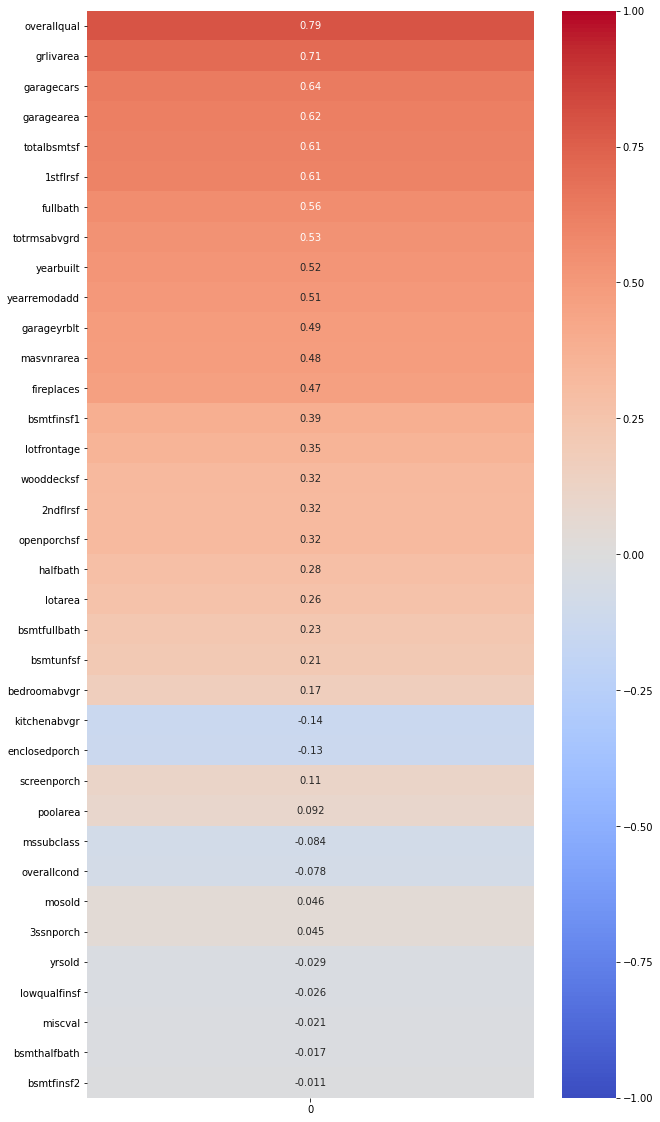

<Figure size 720x1440 with 0 Axes>

In [12]:
# Visualising results of the corr
#sorted_correlations
fig, ax = plt.subplots(figsize=(10,20))
plt.figure(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', vmin=-1, vmax=1, annot=True, ax=ax)
# As we can see, there is a strong correlation between string raws and sale price
# That's why now I will transform they to numeric type

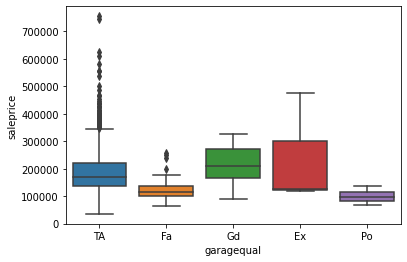

In [57]:
# Visualizing correlation between garage quality and saleprice
sns.boxplot(x=house_data['garagequal'], y=house_data['saleprice'])

# Trying to change qual columns 

In [55]:
# What values has garagequal column
house_data['garagequal'].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: garagequal, dtype: int64

In [56]:
# How many values are droped?
house_data['garagequal'].isnull().sum()

81

In [201]:
# Another way to transform rows
# defining a cleaner function for 'garage_qual'
def garage_qual_cleaner(cell):
    if cell == 'Ex':
        return 5
    elif cell == 'Gd':
        return 4
    elif cell == 'TA':
        return 3
    elif cell == 'Fa':
        return 2
    elif cell == 'Po':
        return 1
    else:
        return 0
    
# applying garage qual cleaner to train data set:
house_garage = house_data['garagequal'].apply(garage_qual_cleaner)
house_garage

Id
1       3
2       3
3       3
4       3
5       3
       ..
1456    3
1457    3
1458    3
1459    3
1460    3
Name: garagequal, Length: 1460, dtype: int64

In [65]:
# Changing columns to numbers 
garage = house_data['garagequal'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
garage_name = garage.rename('garage')
house_with_garage = pd.concat([house_data, garage_name], axis=1)

In [68]:
# Prooving result
house_with_garage.head(5)

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,...,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice,garage
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,...,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,3.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,...,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,3.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,...,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,3.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,...,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,3.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,...,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,3.0


# Doing the same thing with garage_cond and other columns

In [92]:
garage_col['garagecond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: garagecond, dtype: int64

In [93]:
garage_cond = house_data['garagecond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
garage_cond_name = garage.rename('garage_co')
house_with_garage_co = pd.concat([house_with_garage, garage_cond_name], axis=1)

In [123]:
house_with_garage_co.head(3)

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,...,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice,garage,garage_co
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,...,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,3.0,3.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,...,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,3.0,3.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,...,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,3.0,3.0


In [95]:
house_data['mszoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: mszoning, dtype: int64

In [116]:
ms_zon = house_data['mszoning'].map({'RL': 5, 'RM': 4, 'FV': 3, 'RH': 2, 'C (all)': 1})
ms_zon = ms_zon.rename('ms_zon')
house_data_with_ms = pd.concat([house_with_garage_co, ms_zon], axis=1)

In [118]:
house_data_with_ms.head(3)

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,...,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice,garage,garage_co,ms_zon
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,...,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,3.0,3.0,5
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,...,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,3.0,3.0,5
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,...,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,3.0,3.0,5


In [122]:
# Drop old unnecessary columns
house_data_with_ms_1 = house_data_with_ms.drop(columns=['mszoning', 'garagequal', 'garagecond'])
house_data_with_ms_1.head(2)

,mssubclass,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice,garage,garage_co,ms_zon
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,3.0,3.0,5
2,20,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,3.0,3.0,5


# Changing columns with help of loops

In [133]:
# Exploring the column values
print(house_data_with_ms_1.street.value_counts(),'\n')
print('NaNs:', house_data_with_ms_1.street.isnull().sum())

Pave    1454
Grvl       6
Name: street, dtype: int64 

NaNs: 0


In [146]:
# Making new column as a list
street_ = []
for i in house_data_with_ms_1.street:
  if i == 'Pave':
    street_.append(0)
  elif i == 'Grvl':
    street_.append(1)
street_.append(0)

In [171]:
# Transforming list to frame and combining it with main dataset
street_1 = pd.DataFrame(data=street_)
house_data_str = pd.concat([house_data_with_ms_1, street_1], axis=1)
house_data_str = house_data_str.rename(columns={0:'street_type'})
house_data_str = house_data_str.drop(columns='street')
house_data_str = house_data_str.drop(0)

In [172]:
# Performing result
house_data_str.head()

,mssubclass,lotfrontage,lotarea,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice,garage,garage_co,ms_zon,street_type
1,60.0,65.0,8450.0,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,NaN,Attchd,2003.0,RFn,2.0,548.0,Y,0.0,61.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,2.0,2008.0,WD,Normal,208500.0,3.0,3.0,5.0,0
2,20.0,80.0,9600.0,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,8.0,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,1.0,TA,Attchd,1976.0,RFn,2.0,460.0,Y,298.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,5.0,2007.0,WD,Normal,181500.0,3.0,3.0,5.0,0
3,60.0,68.0,11250.0,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,6.0,Typ,1.0,TA,Attchd,2001.0,RFn,2.0,608.0,Y,0.0,42.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,9.0,2008.0,WD,Normal,223500.0,3.0,3.0,5.0,0
4,70.0,60.0,9550.0,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,5.0,1915.0,1970.0,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Gd,Detchd,1998.0,Unf,3.0,642.0,Y,0.0,35.0,272.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,2.0,2006.0,WD,Abnorml,140000.0,3.0,3.0,5.0,0
5,60.0,84.0,14260.0,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,5.0,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,Gd,9.0,Typ,1.0,TA,Attchd,2000.0,RFn,3.0,836.0,Y,192.0,84.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,12.0,2008.0,WD,Normal,250000.0,3.0,3.0,5.0,0


In [175]:
# Exploring alley
print(house_data_str.shape, house_data_str.alley.isnull().sum())

(1460, 80) 1369


In [178]:
# There is no sence in alley column, because of too many NaNs values. I'll drop it
house_data_str = house_data_str.drop(columns='alley')
house_data_str.head(3)

,mssubclass,lotfrontage,lotarea,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice,garage,garage_co,ms_zon,street_type
1,60.0,65.0,8450.0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,NaN,Attchd,2003.0,RFn,2.0,548.0,Y,0.0,61.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,2.0,2008.0,WD,Normal,208500.0,3.0,3.0,5.0,0
2,20.0,80.0,9600.0,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,8.0,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,1.0,TA,Attchd,1976.0,RFn,2.0,460.0,Y,298.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,5.0,2007.0,WD,Normal,181500.0,3.0,3.0,5.0,0
3,60.0,68.0,11250.0,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,6.0,Typ,1.0,TA,Attchd,2001.0,RFn,2.0,608.0,Y,0.0,42.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,9.0,2008.0,WD,Normal,223500.0,3.0,3.0,5.0,0


# Changing columns with a special feature

In [96]:
# Automatisated column changer
def data_cleaner(df):
    # map numeric values onto all the quality columns using a quality dictionary
    qual_dict = {'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}
    # create a list of ordinal column names 
    ordinal_col_names = [col for col in df.columns if (col[-4:] in ['qual', 'cond']) and col[:3] != 'ove'] # last section ignores "overall quality columns which will be addressed below
    # creating a new feature called age
    df['age'] = df.apply(lambda row: row['yrsold'] - max(row['yearbuilt'], row['yearremodadd']), axis=1)
    # dummify the date sold column 
    df['datesold'] = df.apply(lambda row: str(row['mosold'])+ '-' + str(row['yrsold']), axis=1)
    df.loc[:,df.dtypes!= 'object'] = df.loc[:, df.dtypes != 'object'].apply(lambda col: col.fillna(col.mean()))
    
    # transforming columns 
    df[ordinal_col_names] = df[ordinal_col_names].applymap(lambda cell: 2 if pd.isnull(cell) else qual_dict[cell])
    
    return df
# applying the function to train data
house_data_new = data_cleaner(house_data)

In [181]:
# Comparing results of the EDA of this feature
print(house_data.head(2))
print(house_data_new.head(2))
print('\n')
print(house_data.select_dtypes(include='object').shape)
print(house_data_new.select_dtypes(include='object').shape)

    mssubclass mszoning  lotfrontage  ...  saletype salecondition saleprice
Id                                    ...                                  
1           60       RL         65.0  ...        WD        Normal    208500
2           20       RL         80.0  ...        WD        Normal    181500

[2 rows x 80 columns]
    mssubclass mszoning  lotfrontage  ...  saleprice age datesold
Id                                    ...                        
1           60       RL         65.0  ...     208500   5   2-2008
2           20       RL         80.0  ...     181500  31   5-2007

[2 rows x 82 columns]


(1460, 43)
(1460, 37)


# Actually there are much more columns to trnsform in this way, but i will move further and manage to deal with other types of values

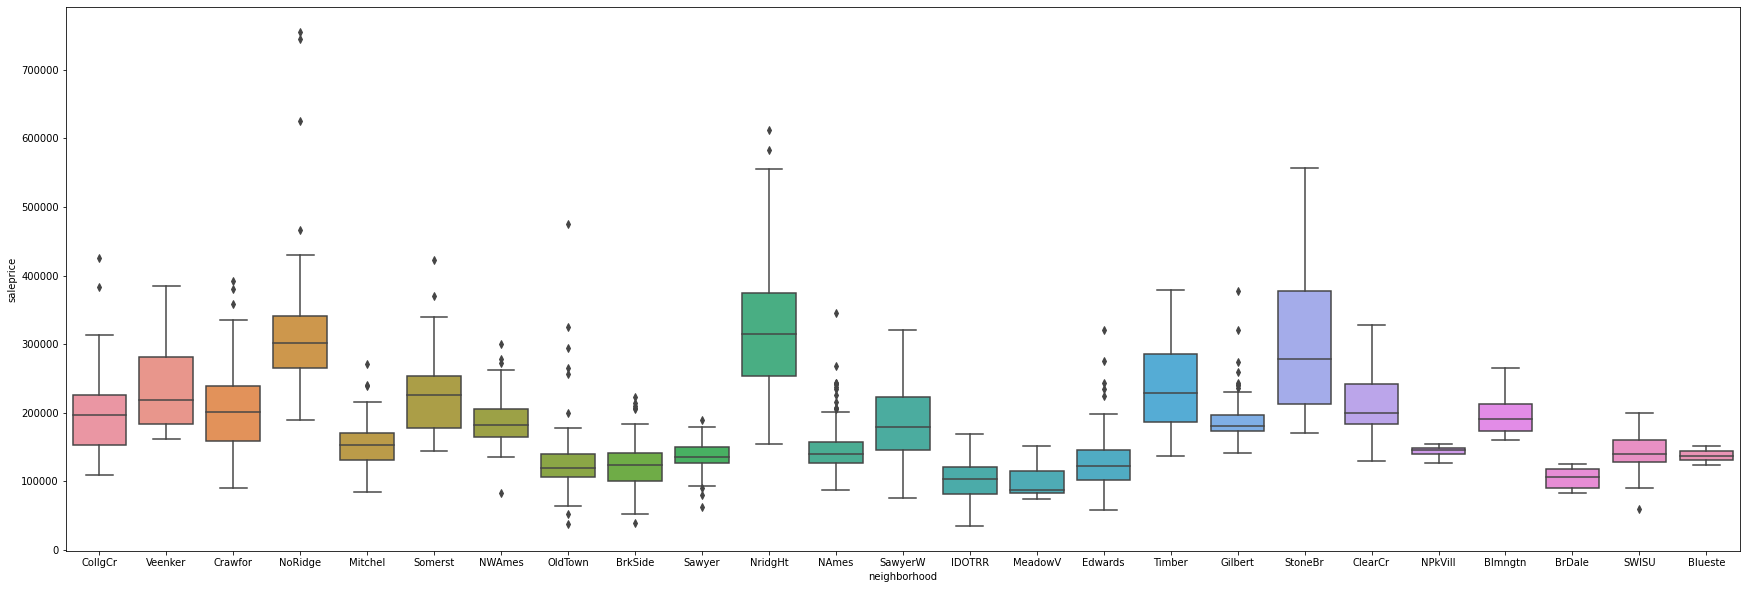

In [189]:
# It is uncorrect to assign numerical values to neighborhoods, because of their unlinear dependence of each on other
# Now seeing how they correlate between them
plt.figure(figsize=(30,10))
sns.boxplot(x=house_data_str['neighborhood'], y=house_data_str['saleprice'])
#plt.savefig('neighborhood.jpg')

In [190]:
# Using dummies to convert values to numeric type
house_dumm = pd.get_dummies(house_data_str, columns=['neighborhood'], drop_first=True)
house_dumm

,mssubclass,lotfrontage,lotarea,lotshape,landcontour,utilities,lotconfig,landslope,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,...,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice,garage,garage_co,ms_zon,street_type,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
1,60.0,65.0,8450.0,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,7.0,5.0,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,2.0,2008.0,WD,Normal,208500.0,3.0,3.0,5.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20.0,80.0,9600.0,Reg,Lvl,AllPub,FR2,Gtl,Feedr,Norm,1Fam,1Story,6.0,8.0,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,5.0,2007.0,WD,Normal,181500.0,3.0,3.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,60.0,68.0,11250.0,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,7.0,5.0,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,9.0,2008.0,WD,Normal,223500.0,3.0,3.0,5.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,70.0,60.0,9550.0,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,2Story,7.0,5.0,1915.0,1970.0,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,2.0,2006.0,WD,Abnorml,140000.0,3.0,3.0,5.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,60.0,84.0,14260.0,IR1,Lvl,AllPub,FR2,Gtl,Norm,Norm,1Fam,2Story,8.0,5.0,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,12.0,2008.0,WD,Normal,250000.0,3.0,3.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60.0,62.0,7917.0,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,6.0,5.0,1999.0,2000.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,953.0,953.0,GasA,Ex,Y,SBrkr,953.0,694.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,8.0,2007.0,WD,Normal,175000.0,3.0,3.0,5.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1457,20.0,85.0,13175.0,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,6.0,6.0,1978.0,1988.0,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790.0,Rec,163.0,589.0,1542.0,GasA,TA,Y,SBrkr,2073.0,0.0,...,0.0,0.0,0.0,NaN,MnPrv,NaN,0.0,2.0,2010.0,WD,Normal,210000.0,3.0,3.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1458,70.0,66.0,9042.0,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,7.0,9.0,1941.0,2006.0,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275.0,Unf,0.0,877.0,1152.0,GasA,Ex,Y,SBrkr,1188.0,1152.0,...,0.0,0.0,0.0,NaN,GdPrv,Shed,2500.0

# Finding outliers in DataFrame

In [191]:
house_dumm.head(3)

,mssubclass,lotfrontage,lotarea,lotshape,landcontour,utilities,lotconfig,landslope,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,...,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice,garage,garage_co,ms_zon,street_type,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
1,60.0,65.0,8450.0,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,7.0,5.0,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,2.0,2008.0,WD,Normal,208500.0,3.0,3.0,5.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20.0,80.0,9600.0,Reg,Lvl,AllPub,FR2,Gtl,Feedr,Norm,1Fam,1Story,6.0,8.0,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,5.0,2007.0,WD,Normal,181500.0,3.0,3.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,60.0,68.0,11250.0,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,7.0,5.0,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,9.0,2008.0,WD,Normal,223500.0,3.0,3.0,5.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


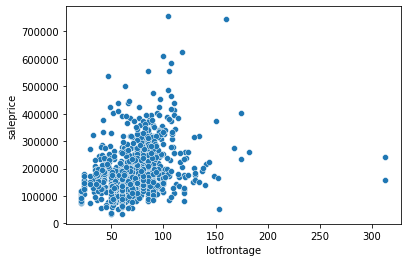

In [195]:
# Choosing column and visualising spred of it
sns.scatterplot(x=house_dumm.lotfrontage, y=house_dumm.saleprice)

In [197]:
# There are some extravalues in lotfrontage. Now we'll delet them
house_dumm.loc[house_dumm.lotfrontage > 150]

,mssubclass,lotfrontage,lotarea,lotshape,landcontour,utilities,lotconfig,landslope,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,...,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice,garage,garage_co,ms_zon,street_type,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
198,75.0,174.0,25419.0,Reg,Lvl,AllPub,Corner,Gtl,Artery,Norm,1Fam,2Story,8.0,4.0,1918.0,1990.0,Gable,CompShg,Stucco,Stucco,None,0.0,Gd,Gd,PConc,TA,TA,No,GLQ,1036.0,LwQ,184.0,140.0,1360.0,GasA,Gd,Y,SBrkr,1360.0,1360.0,...,0.0,0.0,512.0,Ex,GdPrv,NaN,0.0,3.0,2006.0,WD,Abnorml,235000.0,3.0,3.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
232,60.0,174.0,15138.0,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,8.0,5.0,1995.0,1996.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,506.0,Gd,TA,PConc,Gd,TA,No,GLQ,689.0,Unf,0.0,773.0,1462.0,GasA,Ex,Y,SBrkr,1490.0,1304.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,7.0,2009.0,WD,Normal,403000.0,3.0,3.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
935,20.0,313.0,27650.0,IR2,HLS,AllPub,Inside,Mod,PosA,Norm,1Fam,1Story,7.0,7.0,1960.0,2007.0,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,425.0,Unf,0.0,160.0,585.0,GasA,Ex,Y,SBrkr,2069.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,11.0,2008.0,WD,Normal,242000.0,3.0,3.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1108,60.0,168.0,23257.0,IR3,HLS,AllPub,CulDSac,Gtl,Norm,Norm,1Fam,2Story,7.0,5.0,2006.0,2006.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Ex,Gd,No,Unf,0.0,Unf,0.0,868.0,868.0,GasA,Ex,Y,SBrkr,887.0,1134.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,9.0,2006.0,New,Partial,274725.0,3.0,3.0,5.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1128,20.0,182.0,14572.0,IR3,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,7.0,5.0,2004.0,2004.0,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1300.0,Unf,0.0,230.0,1530.0,GasA,Ex,Y,SBrkr,1530.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,11.0,2007.0,WD,Family,259000.0,3.0,3.0,5.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1183,60.0,160.0,15623.0,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,2Story,10.0,5.0,1996.0,1996.0,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096.0,Unf,0.0,300.0,2396.0,GasA,Ex,Y,SBrkr,2411.0,2065.0,...,0.0,0.0,555.0,Ex,MnPrv,NaN,0.0,7.0,2007.0,WD,Abnorml,745000.0,3.0,3.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1212,50.0,152.0,12134.0,IR1,Bnk,AllPub,Inside,Mod,Norm,Norm,1Fam,1.5Fin,8.0,7.0,1988.0,2005.0,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,Wood,Gd,TA,Av,GLQ,427.0,Unf,0.0,132.0,559.0,GasA,Gd,Y,SBrkr,1080.0,672.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,6.0,2010.0,WD,Normal,164000.0,3.0,3.0,5.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1299,60.0,313.0,63887.0,IR3,Bnk,AllPub,Corner,Gtl,Feedr,Norm,1Fam,2Story,10.0,5.0,2008.0,2008.0,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692.0,950.0,...,0.0,0.0,480.0,Gd,NaN,NaN,0.0,1.0,2008.0,New,Partial,160000.0,3.0,3.0,5.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1338,30.0,153.0,4118.0,IR1,Bnk,AllPub,Corner,Mod,Feedr,Norm,1Fam,1Story,4.0,4.0,1941.0,1950.0,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,693.0,693.0,Grav,Fa,N,FuseA,693.0,0.0

In [199]:
# And let them be dropped
rows_to_drop = [198, 232, 935, 1108, 1128, 1183, 1212, 1299, 1338]
for i in rows_to_drop:
  house_dumm = house_dumm.drop(i)

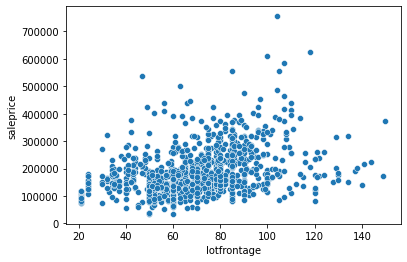

In [200]:
# Checking results
sns.scatterplot(x=house_dumm.lotfrontage, y=house_dumm.saleprice)

In [203]:
# Now we should save the new dataset
house_dumm.to_csv('House_after_EDA.csv')